In [13]:
#imports : 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline



In [2]:
customer = pd.read_csv("dataset/dataset/Customer.csv")
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  10000 non-null  object 
 3   gender            10000 non-null  object 
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  object 
 7   revenue           10000 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 556.8+ KB


In [3]:
customer.describe()

,age,pages,News_click
count,10000.000000,10000.000000,10000.000000
mean,37.431400,5.995000,4.412000
std,9.490474,2.438559,2.418231
min,18.000000,1.000000,0.000000
25%,31.000000,5.000000,3.000000
50%,37.000000,6.000000,4.000000
75%,43.000000,7.000000,6.000000
max,79.000000,14.000000,10.000000


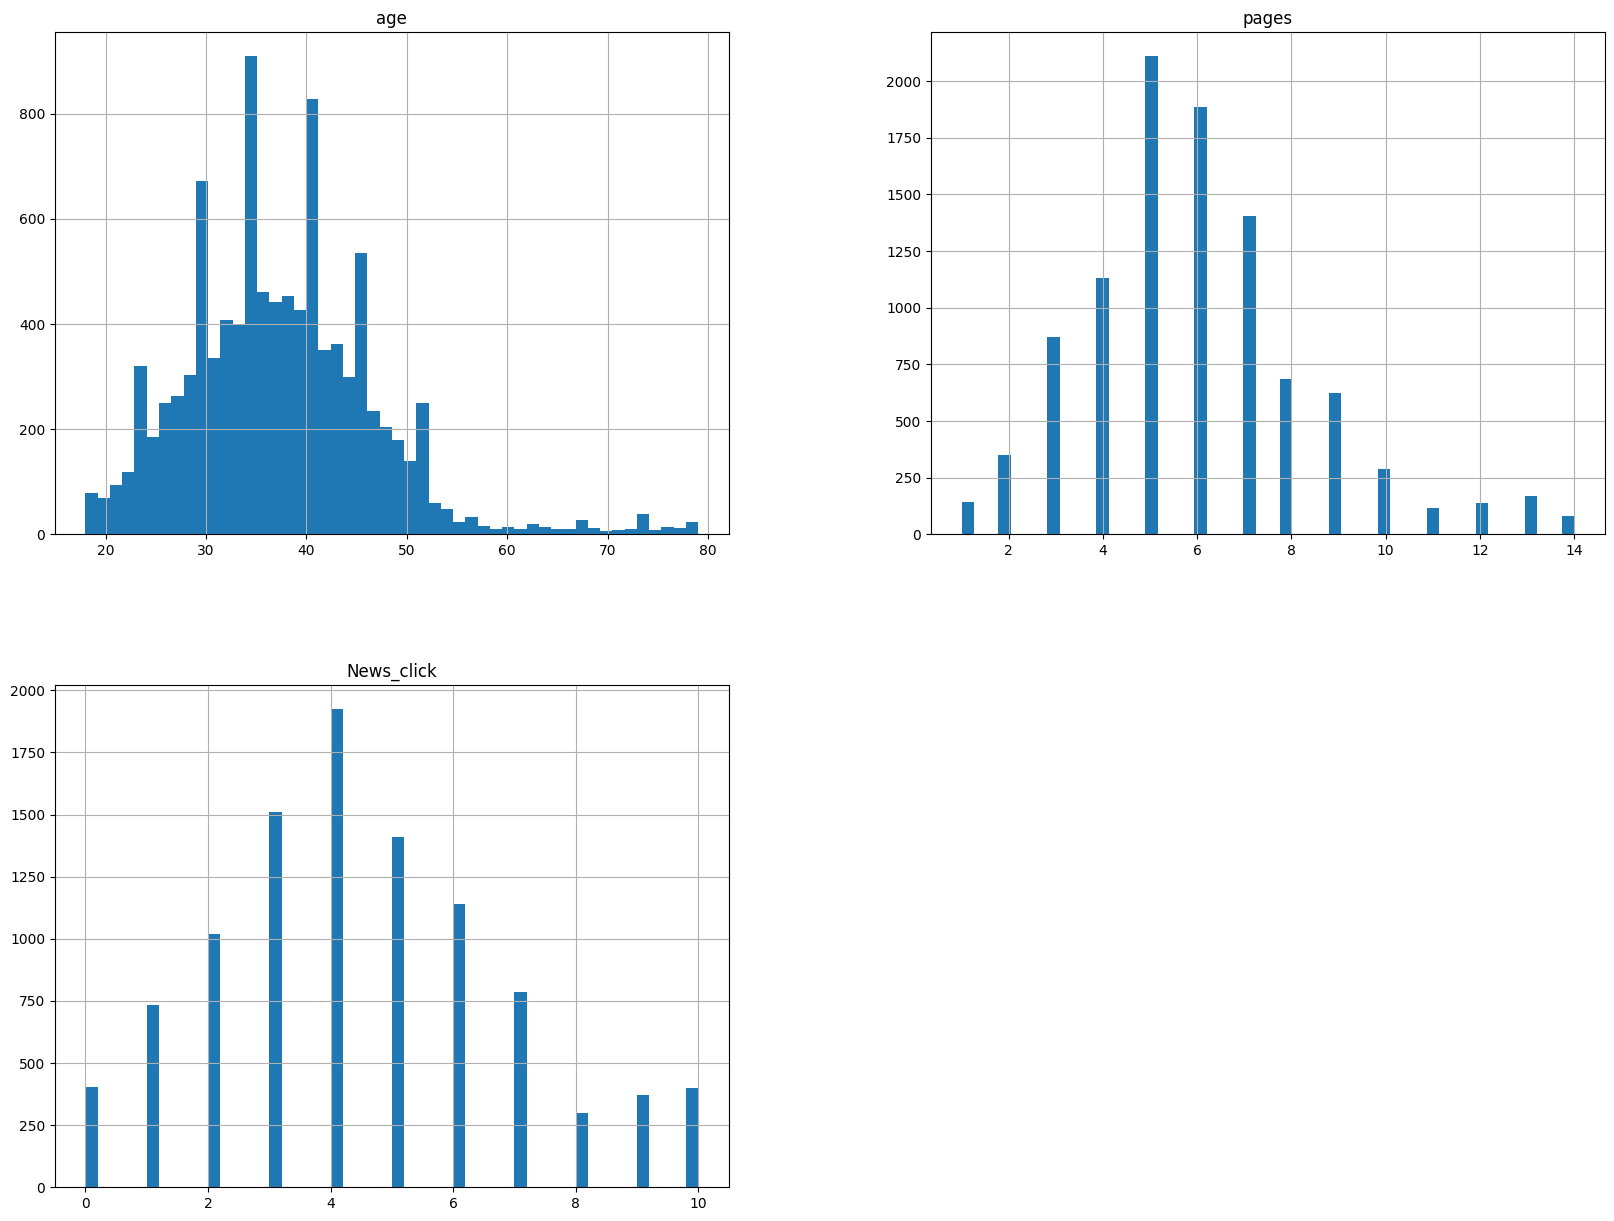

In [4]:
%matplotlib inline
customer.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
customer.isna().sum() 

age                 0
pages               0
first_item_prize    0
gender              0
ReBuy               0
News_click          0
country             0
revenue             0
dtype: int64

Here we can see that no values considered by Panda as Na are present. 
However, this does not exclude the presence of special characters such as -, ?, “ ” etc.

In [6]:
customer = customer.replace(["-", "?", " "], np.nan)
customer.isna().sum() 

age                 0
pages               0
first_item_prize    3
gender              0
ReBuy               0
News_click          0
country             0
revenue             0
dtype: int64

After taking into account the special characters, several Na values are detected.

In [9]:
cols_quanti = ["age", "pages", "first_item_prize", "News_click", "revenue"]
print(customer.dtypes)

age                 float64
pages               float64
first_item_prize     object
gender               object
ReBuy                  bool
News_click          float64
country              object
revenue              object
dtype: object


Pandas considers first_item_prize and revenue as objects, so we must convert them to numbers before we can proceed.

In [10]:
for col in ["first_item_prize", "revenue"]:
    customer[col] = pd.to_numeric(customer[col], errors="coerce")

print(customer.dtypes)

age                 float64
pages               float64
first_item_prize    float64
gender               object
ReBuy                  bool
News_click          float64
country              object
revenue             float64
dtype: object


Quantitative values are well recognized as such.

In [ ]:
pipeline = Pipeline([])